In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
data=pd.read_csv('/content/heart_disease_data.csv')

In [44]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
data.shape

(303, 14)

In [46]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
x=data.drop('target',axis=1)

In [48]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [49]:
y=data['target']

In [50]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


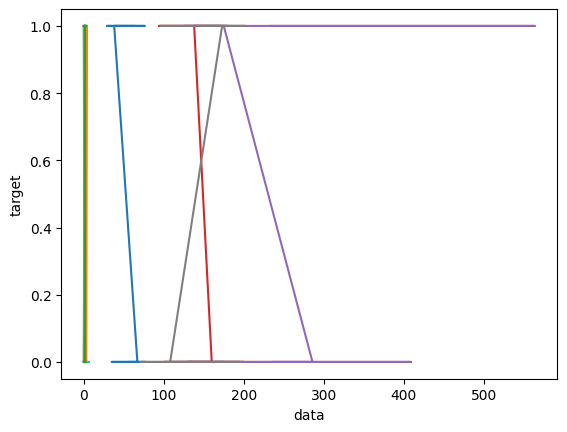

In [60]:
plt.plot(x,y)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [52]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (272, 13) (31, 13)


In [53]:
model=LogisticRegression()

In [54]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
xtrainpredict=model.predict(x_train)
xtestpredict=model.predict(x_test)
print(xtrainpredict)
print(xtestpredict)

[1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1
 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1
 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0
 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 1 0]
[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1]


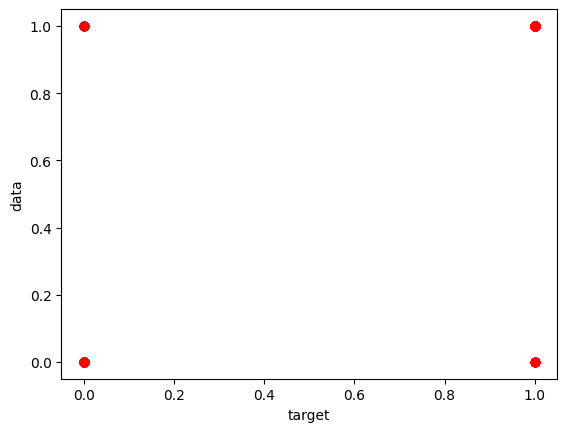

In [56]:
plt.scatter(y_train,xtrainpredict,color='red')
plt.xlabel('target')
plt.ylabel('data')
plt.show()

In [57]:
xtrainaccuracy=accuracy_score(xtrainpredict,y_train)
print(xtrainaccuracy)

xtestaccuracy=accuracy_score(xtestpredict,y_test)
print(xtestaccuracy)

0.8382352941176471
0.9354838709677419


In [63]:
input=(53,1,0,140,203,1,0,155,1,3.1,0,0,3)
input_arr=np.asarray(input)
inp_reshape=input_arr.reshape(1,-1)
prediction=model.predict(inp_reshape)
if(prediction[0]==0):
  print('no heart disease')
else:
  print('haert disease')

no heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
